# Black-Scholes Option Price Sensitivity Analysis

## Table of Contents
- Introduction
- Call Option Time Sensitivity
- Call Option Spot Price Sensitivity
- Put Option Time Sensitivity
- Put Option Spot Price Sensitivity
- Key Observations
- Extended Sensitivity Analysis
  - Advanced Visualizations
  - Comprehensive Price Matrices
  - Greeks (Delta)
  - Interactive Dashboard
- Conclusion  

## Introduction

The sensitivity of Black-Scholes option prices to different market factors, such as interest rates, volatility, time to expiration, and spot price, is investigated in this study.  The Black-Scholes model, which provides theoretical values for European call and put options, is a fundamental component of financial derivatives pricing.  We examine the behavior of option prices and Greeks (like Delta) under various conditions using visualizations such as 2D plots, 3D surfaces, interactive plots, and animations.

## Importing Packages

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import plotly.graph_objects as go
from ipywidgets import interact, FloatSlider

## Call Option - Time Sensitivity

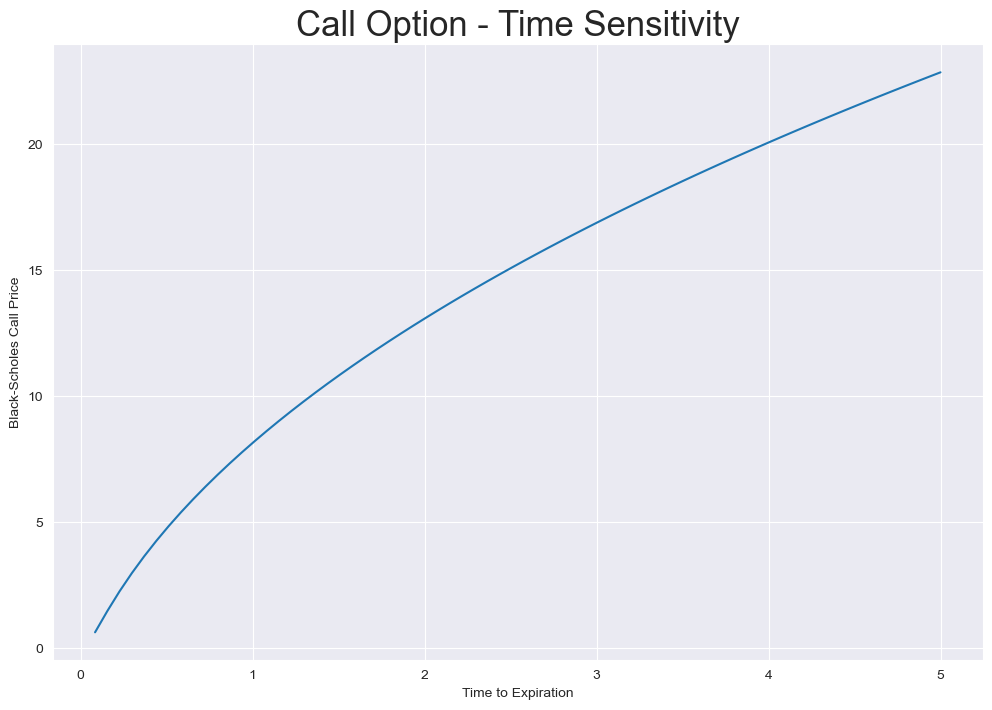

In [10]:
def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)

def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)

S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Call Option - Time Sensitivity', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

## a. 
From the graph above, we see that:
- When the time to expiration reduces, the price of the call option falls (moving left on the x-axis).
- The price decay rate increases as expiration draws near (the curve steepens at t=0).
- The price fluctuates more slowly for extended periods before expiration.

## b. Call Option - Spot Price Sensitivity

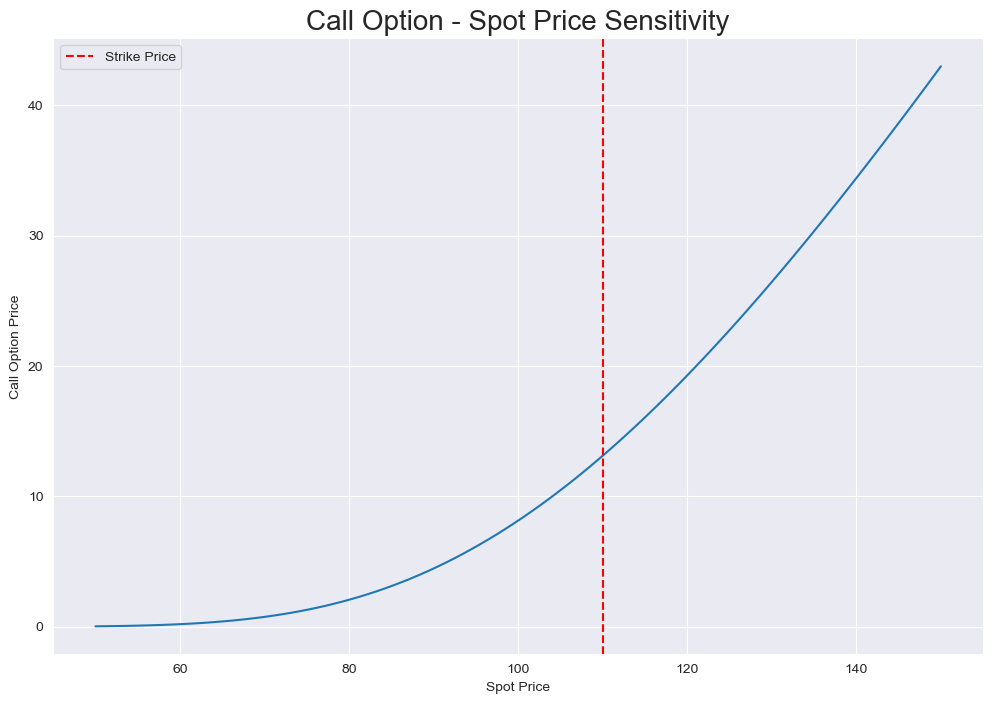

In [11]:
spot_prices = np.linspace(50, 150, 100)
call_prices_spot = [bs_call(S,K,sigma) for S in spot_prices]

plt.figure(figsize=(12,8))
plt.title('Call Option - Spot Price Sensitivity', size=20)
plt.plot(spot_prices, call_prices_spot)
plt.xlabel('Spot Price')
plt.ylabel('Call Option Price')
plt.axvline(x=K, color='r', linestyle='--', label='Strike Price')
plt.legend()
plt.show()

## c.

### Put Option Time Sensitivity

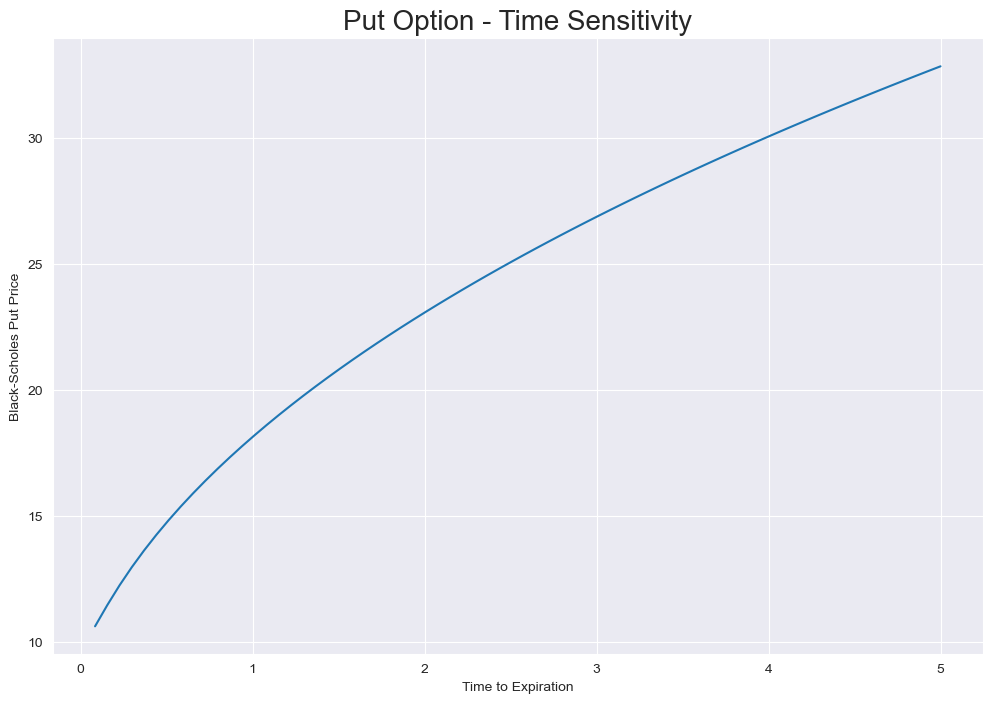

In [12]:
put_prices = [bs_put(S0,K,sigma, t=times[i]) for i in range(len(times))]

plt.figure(figsize=(12,8))
plt.title('Put Option - Time Sensitivity', size=20)
plt.plot(times, put_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Put Price')
plt.show()

### Put Option Spot Price Sensitivity

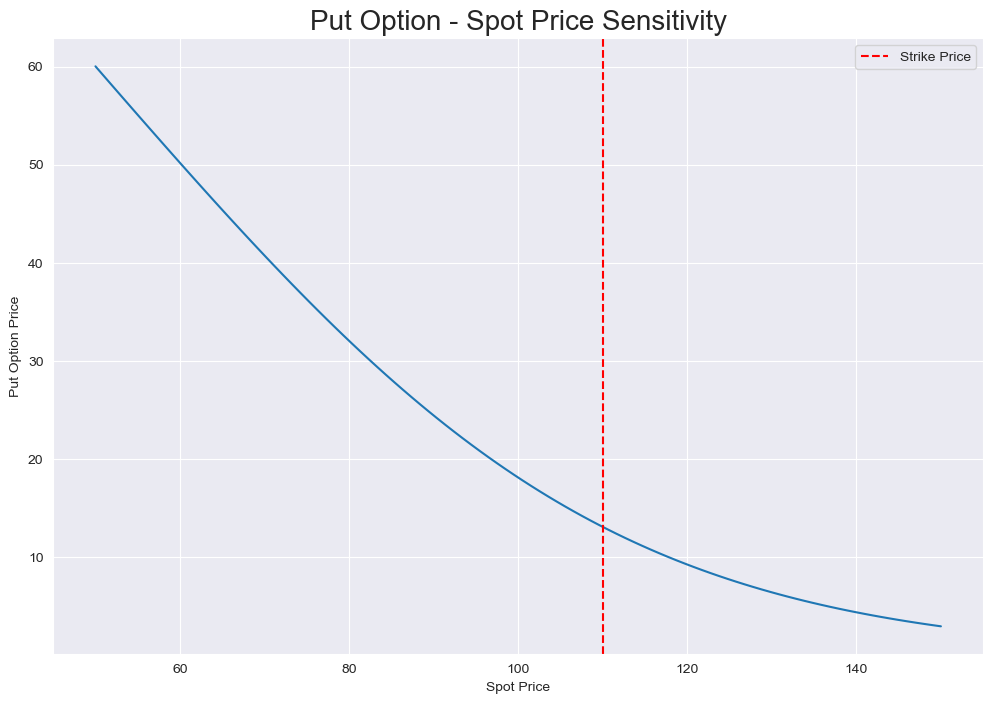

In [13]:
put_prices_spot = [bs_put(S,K,sigma) for S in spot_prices]

plt.figure(figsize=(12,8))
plt.title('Put Option - Spot Price Sensitivity', size=20)
plt.plot(spot_prices, put_prices_spot)
plt.xlabel('Spot Price')
plt.ylabel('Put Option Price')
plt.axvline(x=K, color='r', linestyle='--', label='Strike Price')
plt.legend()
plt.show()

## d. Observations

### Call Option – Time Sensitivity
- Time decay (theta) is demonstrated by the call option price declining as the time to expiration decreases.

- As expiry draws near, the rate of decay increases (non-linear decrease).

- The price of longer-dated options is less susceptible to fluctuations in time.

### Call Option – Spot Price Sensitivity
- A higher spot price results in a higher call option price (positive delta).

- The price tends to follow a linear connection ($\Delta\approx 1$) for calls that are right in-the-money (spot price >> strike).

- When the spot price is less than the strike, the price is close to zero for deep out-of-the-money calls.

### Put Option – Time Sensitivity
- Put options lose value as expiration approaches (negative theta), just like calls do.

- As expiry draws near, the non-linear degradation rate increases.


- The time decay of far-dated puts is slower than that of short-dated puts.

### Put Option – Spot Price Sensitivity
- When spot prices rise, the price of the put option falls (negative delta).

- $\Delta\rightarrow -1$ for puts that are deep in-the-money (spot price << strike).

- The price approaches zero for puts that are deep out-of-the-money (spot price >> strike).

## Extended Sensitivity Analysis

## 1. Advanced Visualizations

### 1.1. 3D Surface Plot of Option Prices

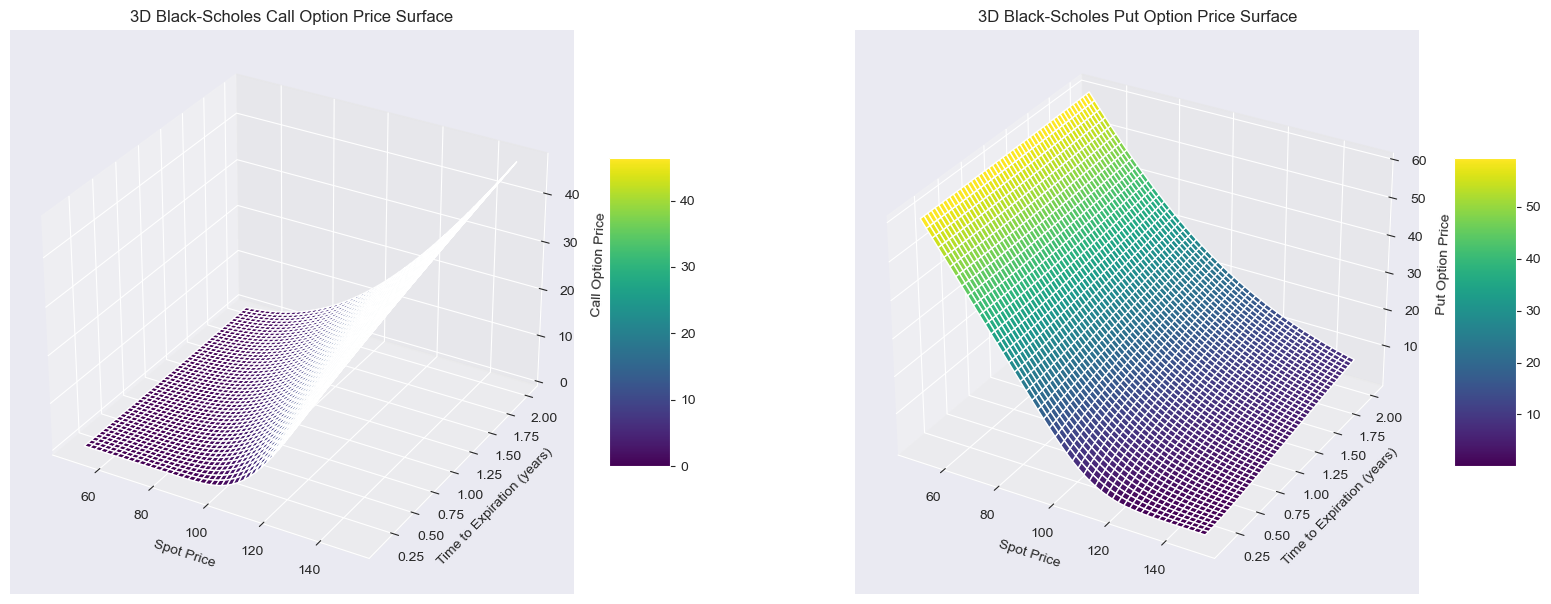

In [14]:
S_range = np.linspace(50, 150, 50)
T_range = np.linspace(0.1, 2, 50)
S_grid, T_grid = np.meshgrid(S_range, T_range)

call_prices = np.array([[bs_call(S, K, sigma, t) for S in S_range] for t in T_range])
put_prices = np.array([[bs_put(S, K, sigma, t) for S in S_range] for t in T_range])

fig = plt.figure(figsize=(20, 8))

# Call option surface
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(S_grid, T_grid, call_prices, cmap='viridis')
ax1.set_xlabel('Spot Price')
ax1.set_ylabel('Time to Expiration (years)')
ax1.set_zlabel('Call Option Price')
ax1.set_title('3D Black-Scholes Call Option Price Surface')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

# Put option surface
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(S_grid, T_grid, put_prices, cmap='viridis')
ax2.set_xlabel('Spot Price')
ax2.set_ylabel('Time to Expiration (years)')
ax2.set_zlabel('Put Option Price')
ax2.set_title('3D Black-Scholes Put Option Price Surface')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

plt.show()

### 1.2  Animated Time Decay Plots - Spot Price Sensitivity for Call and Put options

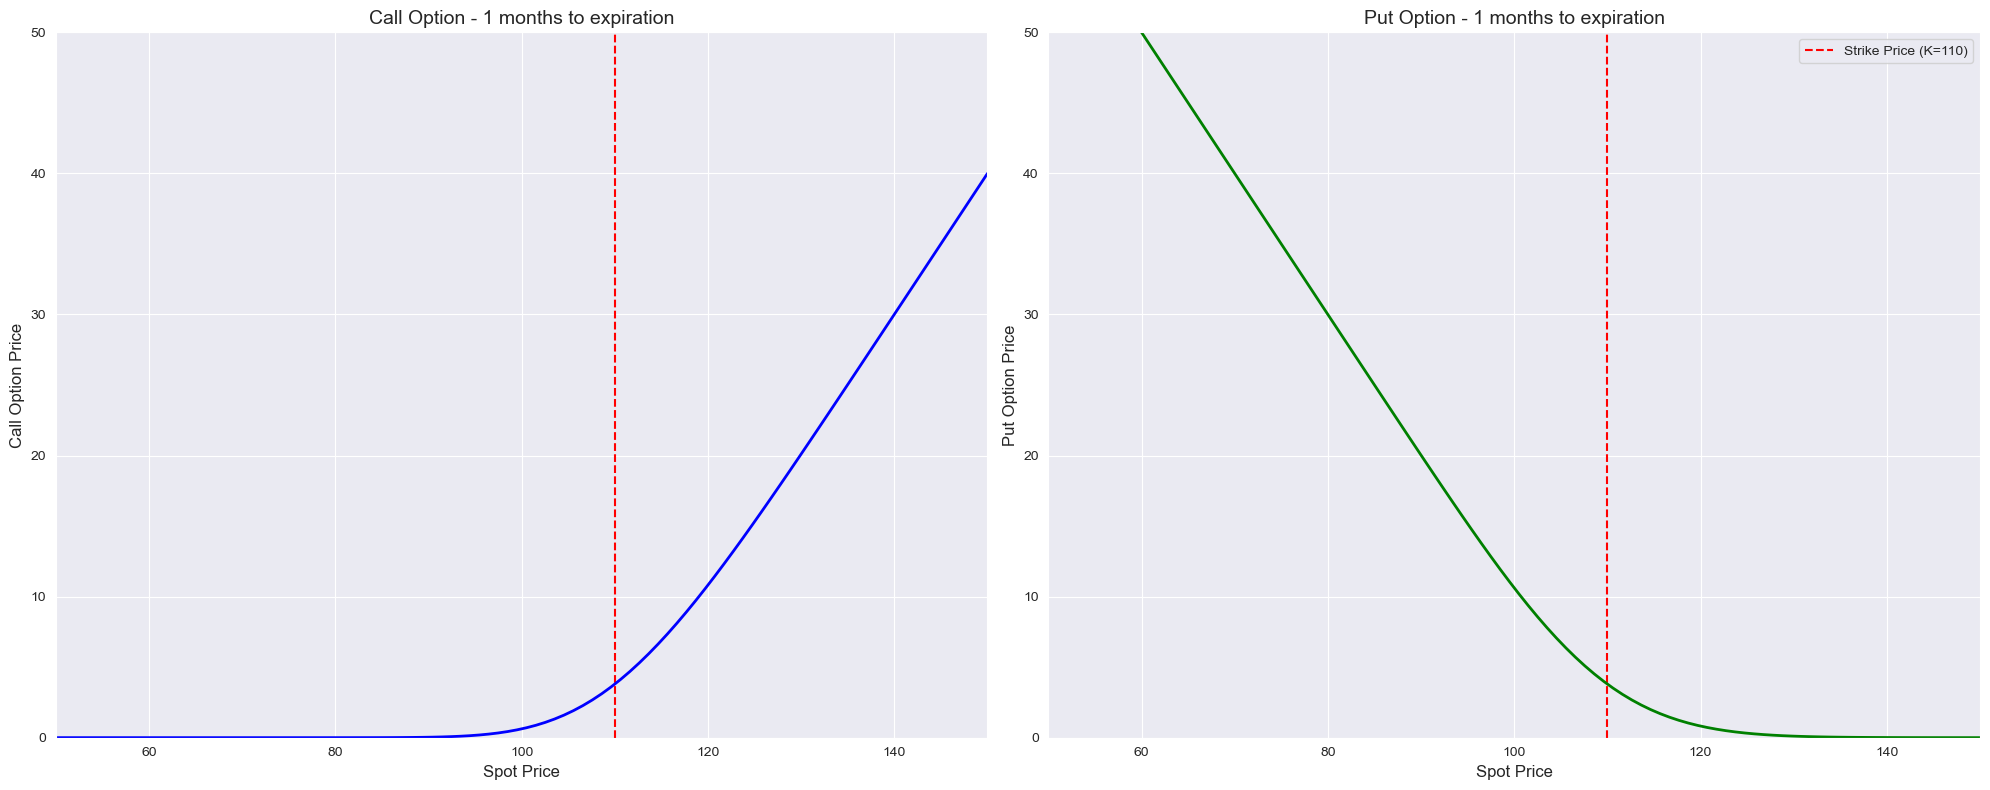

In [15]:
  S_range = np.linspace(50, 150, 100)  

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

for ax in (ax1, ax2):
    ax.set_xlim(50, 150)
    ax.set_ylim(0, 50)
    ax.set_xlabel('Spot Price', fontsize=12)
    ax.grid(True)
    ax.axvline(x=K, color='r', linestyle='--', label=f'Strike Price (K={K})')

ax1.set_ylabel('Call Option Price', fontsize=12)
ax1.set_title('Animated Call Option Time Decay', fontsize=14)
call_line, = ax1.plot([], [], lw=2, color='blue')

ax2.set_ylabel('Put Option Price', fontsize=12)
ax2.set_title('Animated Put Option Time Decay', fontsize=14)
put_line, = ax2.plot([], [], lw=2, color='green')

def init():
    call_line.set_data([], [])
    put_line.set_data([], [])
    return call_line, put_line,

def animate(t):
    call_prices = [bs_call(S, K, sigma, t/12) for S in S_range]
    call_line.set_data(S_range, call_prices)
    ax1.set_title(f'Call Option - {t} months to expiration', fontsize=14)
    
    put_prices = [bs_put(S, K, sigma, t/12) for S in S_range]
    put_line.set_data(S_range, put_prices)
    ax2.set_title(f'Put Option - {t} months to expiration', fontsize=14)
    
    return call_line, put_line,

ani = FuncAnimation(fig, animate, 
                    frames=range(24, 0, -1), 
                    init_func=init, 
                    blit=True, 
                    interval=200)

plt.legend()
plt.tight_layout()
HTML(ani.to_jshtml())

## 2. Comprehensive Price Matrices

### 2.1 Call Option Price Matrix

In [7]:
strikes = np.linspace(80, 120, 5)
times = [1/12, 3/12, 6/12, 9/12, 1, 15/12, 18/12, 21/12, 2, 3]  
spot_prices = np.linspace(80, 120, 10)

# Create DataFrame
call_matrix = pd.DataFrame(index=spot_prices, columns=times)
for S in spot_prices:
    for t in times:
        call_matrix.loc[S, t] = bs_call(S, K, sigma, t)

print("Call Option Price Matrix (Black-Scholes)")
display(call_matrix.style.background_gradient(cmap='Blues').format("{:.2f}").set_caption("Call Option Prices for Various Spot Prices and Expirations"))

Call Option Price Matrix (Black-Scholes)


### 2.2 Put Option Price Matrix

In [8]:
put_matrix = pd.DataFrame(index=spot_prices, columns=times)
for S in spot_prices:
    for t in times:
        put_matrix.loc[S, t] = bs_put(S, K, sigma, t)

print("Put Option Price Matrix (Black-Scholes)")
display(put_matrix.style.background_gradient(cmap='Reds').format("{:.2f}").set_caption("Put Option Prices for Various Spot Prices and Expirations"))

Put Option Price Matrix (Black-Scholes)


## 3. Greeks (Delta)

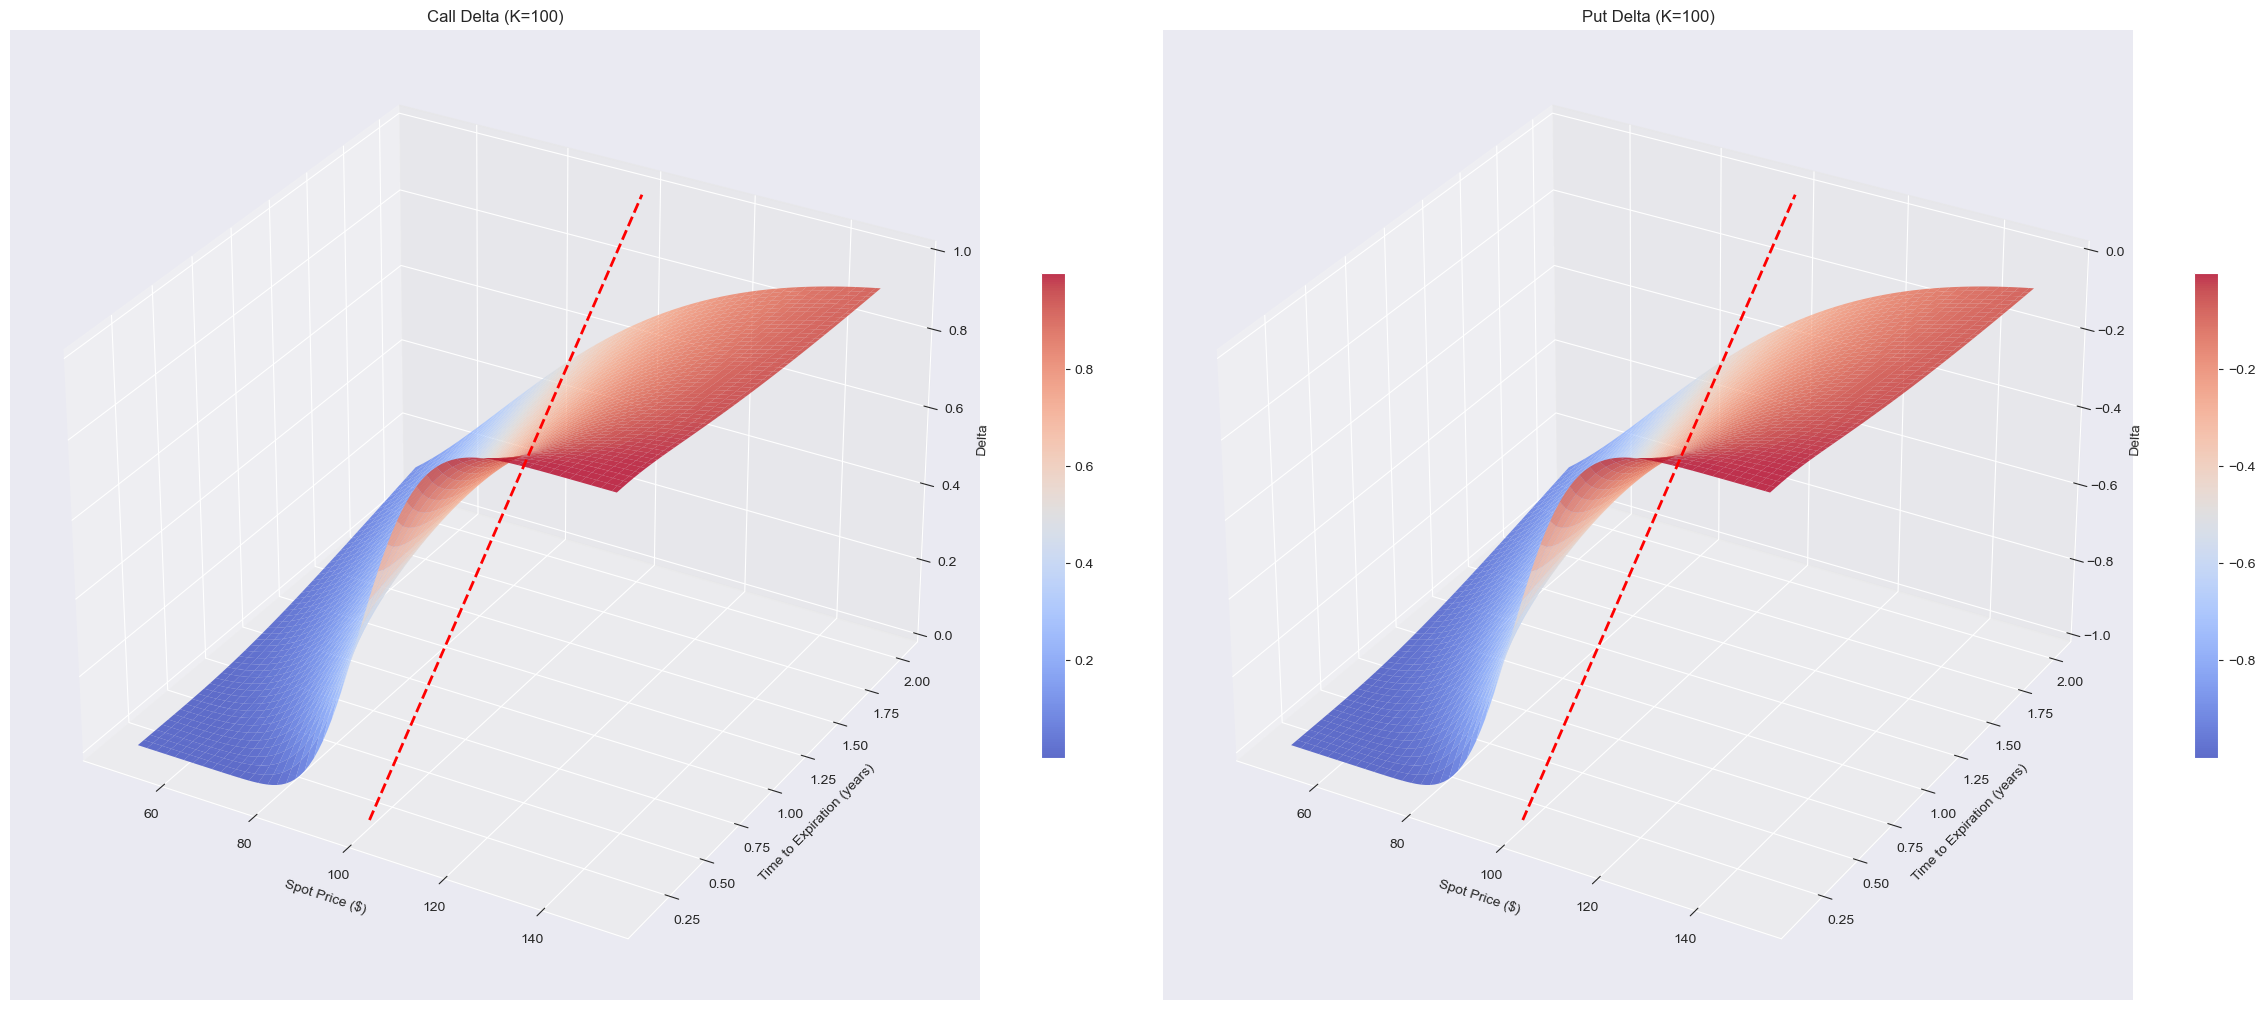

In [17]:
def bs_delta(S, K, sigma, t, r=0, option_type='call'):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*t)/(sigma*np.sqrt(t))
    if option_type == 'call':
        return norm.cdf(d1)
    else:  
        return norm.cdf(d1) - 1

K = 100
sigma = 0.3
r = 0.05

S_range = np.linspace(50, 150, 100)
T_range = np.linspace(0.1, 2, 50)
S_grid, T_grid = np.meshgrid(S_range, T_range)

# Calculate deltas for both options
call_delta = bs_delta(S_grid, K, sigma, T_grid, r, 'call')
put_delta = bs_delta(S_grid, K, sigma, T_grid, r, 'put')

fig = plt.figure(figsize=(24, 10))

# Call delta plot 
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(S_grid, T_grid, call_delta, cmap='coolwarm', 
                        edgecolor='none', alpha=0.8)
ax1.set_xlabel('Spot Price ($)')
ax1.set_ylabel('Time to Expiration (years)')
ax1.set_zlabel('Delta')
ax1.set_title(f'Call Delta (K={K})')
fig.colorbar(surf1, ax=ax1, shrink=0.5)

# Put delta plot
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(S_grid, T_grid, put_delta, cmap='coolwarm',
                        edgecolor='none', alpha=0.8)
ax2.set_xlabel('Spot Price ($)')
ax2.set_ylabel('Time to Expiration (years)')
ax2.set_zlabel('Delta')
ax2.set_title(f'Put Delta (K={K})')
fig.colorbar(surf2, ax=ax2, shrink=0.5)

# Add strike reference to both
for ax in [ax1, ax2]:
    z_range = [0,1] if ax == ax1 else [-1,0]
    ax.plot([K,K], [T_range.min(), T_range.max()], z_range, 
            'r--', linewidth=2)

plt.tight_layout()
plt.show()

## 4. Interactive Dashboard

In [18]:
def interactive_bs(S0=100, K=100, sigma=0.3, r=0.05):
    times = np.linspace(0.1, 2, 50)
    calls = [bs_call(S0, K, sigma, t, r) for t in times]
    puts = [bs_put(S0, K, sigma, t, r) for t in times]
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=times, y=calls, name='Call Option'))
    fig.add_trace(go.Scatter(x=times, y=puts, name='Put Option'))
    fig.update_layout(title='Option Prices vs Time to Expiration',
                    xaxis_title='Time to Expiration (years)',
                    yaxis_title='Option Price')
    fig.show()

interact(interactive_bs,
         S0=FloatSlider(min=50, max=150, step=5, value=100),
         K=FloatSlider(min=50, max=150, step=5, value=100),
         sigma=FloatSlider(min=0.1, max=0.8, step=0.05, value=0.3),
         r=FloatSlider(min=0, max=0.1, step=0.01, value=0.05))

interactive(children=(FloatSlider(value=100.0, description='S0', max=150.0, min=50.0, step=5.0), FloatSlider(v…

<function __main__.interactive_bs(S0=100, K=100, sigma=0.3, r=0.05)>

## Conclusion

This comprehensive analysis of Black-Scholes option pricing has yielded several important insights:

### Key Findings
- **Time Decay (Theta)**
  - Both call and put options experience accelerated price erosion as expiration approaches.
  - The non-linear decay pattern is most pronounced in the final months before expiry.

- **Moneyness Effects**
  - Call options demonstrate positive delta ($0 \to 1$) as spot price increases.
  - Put options show negative delta ($-1\to  0$) with rising spot prices.
  - Maximum sensitivity occurs at-the-money for both option types.

- **Volatility Impact**
  - Higher volatility increases option premiums across all maturities.
  - Longer-dated options exhibit greater sensitivity to volatility changes.

- **Interactive Dashboard Insights**
  - The dynamic visualization tool successfully demonstrates:
    - Real-time price changes across different spot prices ($S_0$) and strikes ($K$).
    - Sensitivity to volatility ($\sigma$) adjustments.
    - Impact of varying risk-free rates ($r$).
    - Comparative behavior of calls vs puts under identical market conditions.

### Practical Applications
These results have direct relevance for:
- Portfolio managers hedging option positions.
- Traders evaluating time decay strategies.
- Risk analysts assessing sensitivity to market movements.
- Educators demonstrating option pricing concepts.
- Students learning Greeks and their interactions.

### Future Extensions
Potential enhancements could include:
- Incorporating dividend yields.
- Analyzing implied volatility surfaces.
- Developing real-time market data integration.
- Adding American-style option pricing.
- Implementing strategy payoff visualizations (spreads, straddles, etc.).

This project effectively connects theoretical finance with real-world application by offering dynamic interactive tools for thorough options analysis in addition to static visuals.  Intuitive graphics and rigorous mathematics combine to produce a potent framework for comprehending and using option pricing principles in practical situations.